In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

## Решение задачи классификации с помощью *Keras*

### Подготовка данных

In [2]:
balance_scale_df = pd.read_csv('../data/balance_scale_preprocessed.csv')
balance_scale_df.head()

,Class_Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [3]:
balance_scale_df['Class_Name'] = LabelEncoder().fit_transform(balance_scale_df['Class_Name'].tolist())

In [4]:
X = balance_scale_df.drop(columns='Class_Name')
y = balance_scale_df['Class_Name']

Разбиваем исходные данные на обучающую и контрольную выборки. Обучающая выборка составляет 80% от объема исходных данных, а контрольная составляет, соответственно, 20%.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Объявляем *StandardScaler* для нормализации данных.

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Модель №1¶

In [7]:
model1 = Sequential()
model1.add(Dense(20, input_dim=4, activation='sigmoid'))
model1.add(Dense(8, activation='sigmoid'))
model1.add(Dense(1, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


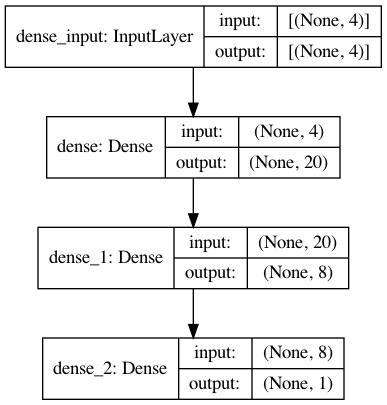

In [8]:
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
model1.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [10]:
%%time
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10, verbose=0)

CPU times: user 1min 29s, sys: 9.81 s, total: 1min 39s
Wall time: 1min 19s


In [11]:
_, accuracy = model1.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4608
Accuracy: 46.08


In [12]:
model1.save('model1')

INFO:tensorflow:Assets written to: model1/assets


### Модель №2¶

In [13]:
model2 = Sequential()
model2.add(Dense(20, input_dim=4, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                100       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


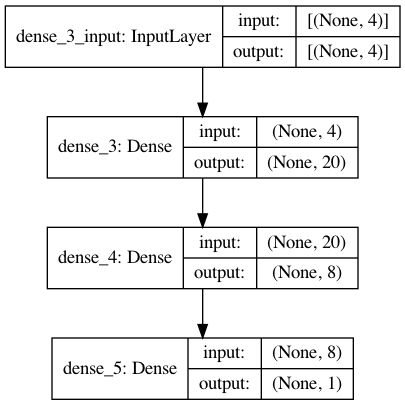

In [14]:
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
%%time
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=25, verbose=0)

CPU times: user 57.2 s, sys: 4.37 s, total: 1min 1s
Wall time: 53.4 s


In [17]:
model2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5040


[0.0, 0.5040000081062317]

In [18]:
model2.save('model2')

INFO:tensorflow:Assets written to: model2/assets


**Вывод:** Полученные модели имеют плохое качество, они дольше обучаются и показывают гораздо худшие результаты, чем простые. Причина низкой точности может заключаться в том, что для нейронной сети данные недостаточно вариативны. В наборе данных имеется много повторяющихся значений. В этом случае лучше использовать классические модели, они более точны.